# Temperature Profiles for the Northern Boundary #

Our Sponge layer has a set temperature profile:
\begin{equation}
T^*(z)=\Delta T\frac{(e^{z/N}-e^{-H/N})}{1-e^{-H/N}} ,
\end{equation} 

Simply we alter $\Delta T $ and N



In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
import math
from pylab import *
from IPython.display import display, Math, Latex
from numba import jit
import glob
%matplotlib inline
# Use writeFile to write files in the correct format!
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from Writebin import *

In [2]:
Topo="flat"  # Please Choose ridge, slope or flat
Wind="Standard"  # Sine bell 0.2N/m$^2$
Heat="nonetQ"  # Please Choose Abernathey or nonetQ
BC="Sponge"  # Please Choose Sponge or Diffusion
Name="Changing_Strat0"  # Give Experiment Name
N0 = 1000.0 
deltaT0 = 8.0

In [3]:
# Adjust accordingly
Res = 5000
Ly = 2000e3
Lx = 1000e3 #Full domain = 4000km otherwise 1000km
H = 3000. # Diffusion = 3800m, Sponge = 2985m
nz = 30 # Diffusion = 24 level, Sponge= 30 levels
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']

In [4]:
#Dimensions
nx = np.round(Lx/Res)
ny = np.round(Ly/Res)
dx = np.ones(nx)*Res
dy = np.ones(ny)*Res
#Write binary output
writeFile('delY',dy)
writeFile('delX',dx)
# Create c-grid with grid points in dead center
x = (np.cumsum(dx)-dx/2)-Lx/2
y = (np.cumsum(dy)-dy/2)-Ly/2
[Y, X] = np.meshgrid(y, x) 

/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


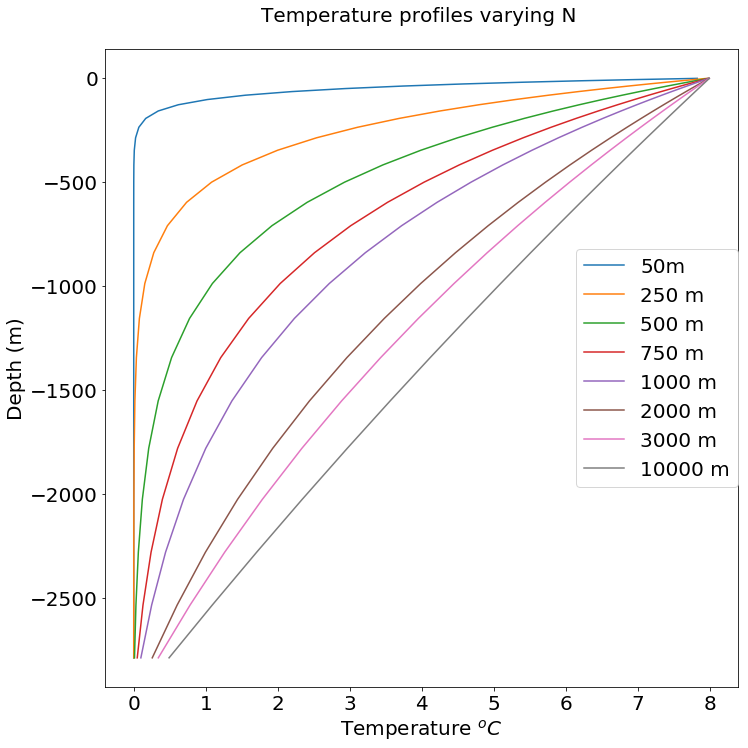

In [44]:
fig = plt.figure(figsize=(10.5, 10.5))
#Parameters
Ns=[0.05e3,0.25e3,0.5e3, .75e3, 1e3, 2e3, 3e3,1e4 ] # Natural stratification
#Ns= np.array(Ns)

deltaT=8
Tref=np.zeros(nz)

N=np.tile(Ns[:],(nz,1)).T
# Parameters
deltaT=8
Tref=np.zeros((8,nz))
# Create depth array:
# Tanh - normal
zp = np.linspace(1,0,31)
zp = H+H*(tanh(-0.9*pi*zp))
zp = zp - zp[0]-(zp[1]-zp[0])
zp = np.round(zp,2)
dz = zp[0:-1] - zp[1::]
dz[-4::] = dz[-4]
zp[-1] = H
zp[1::] = np.cumsum(dz)
zp[0] = -0.5*zp[0]
# Z center points
z = zeros((nz))
z[1::] = (zp[1:-1]+zp[2::])/2
z[0]= -zp[0]/2
Tref = (deltaT*(exp(z[:]/N)-exp(-H/N))/(1-exp(-H/N))).T
p=plot(Tref,z)
#ax.gca().invert_yaxis()
plt.title('Temperature profiles varying N \n', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xlabel('Temperature $^oC$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(['50m','250 m','500 m','750 m','1000 m' , '2000 m','3000 m','10000 m' ], loc=5, borderaxespad=0.,fontsize=20)
plt.tight_layout()

## But this lead to isotherms at the southern boundary not seen at the northern boundary... ##
We must adjust Eq. 1


\begin{equation}
T^*(z)=\Delta T \frac{(e^{z/N}-e^{-H/N})}{1-e^{-H/N}} + 2\left(\frac{N-N_0}{N_0}\right),
\end{equation} 

N max = H 

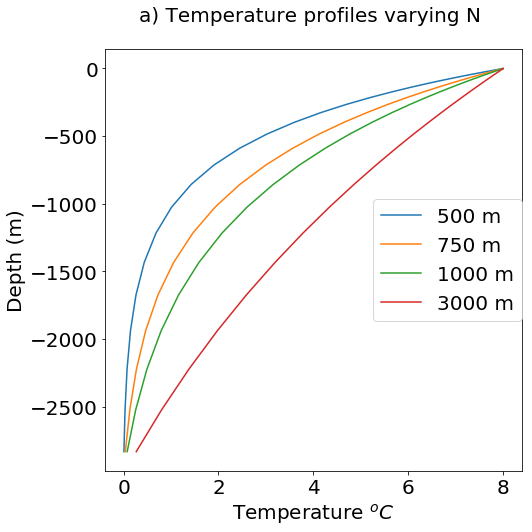

In [45]:
#Parameters
Ns=[0.5e3, .75e3, 1e3, 3e3] # stratification
deltaT=8
Tref=np.zeros(nz)
fig = plt.figure(figsize=(7.5, 7.5))
N=np.tile(Ns[:],(nz,1)).T
# Parameters
deltaT = 8. #- ((N-N0)/N0)
# Create depth array:
# Tanh - normal
zp = np.linspace(1,0,31)
zp = H+H*(tanh(-pi*zp))
zp = zp - zp[0]-(zp[1]-zp[0])
zp = np.round(zp,2)
dz = zp[0:-1] - zp[1::]
zp[-1] = H
zp[1::] = np.cumsum(dz)
zp[0] = 0.5*zp[0]
# Z center points
z = zeros((nz))
z[1::] = (zp[1:-1]+zp[2::])/2
z[0]= zp[0]/2
Tref = (deltaT*(exp(z[:]/N)-exp(-H/N))/(1-exp(-H/N))).T
p=plt.plot(Tref,z)
plt.title('a) Temperature profiles varying N \n', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xlabel('Temperature $^oC$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(['500 m','750 m','1000 m' ,'3000 m' ], loc=5, borderaxespad=0.,fontsize=20)

plt.tight_layout()

## Altering $\Delta T $ ##

\begin{equation}
T^*(z)=\Delta T\frac{(e^{z/N}-e^{-H/N})}{1-e^{-H/N}} + 2 \left( \frac{\Delta T _0 - \Delta T }{\Delta T _0}\right),
\end{equation} 

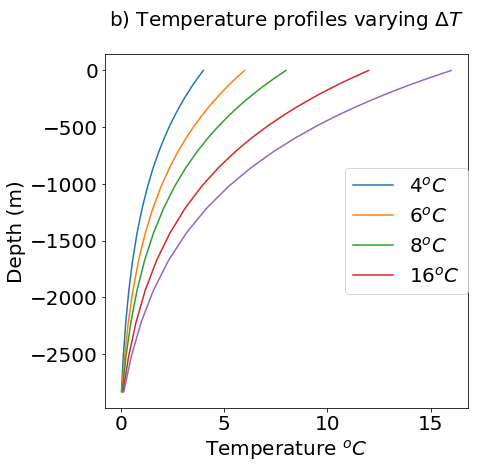

In [46]:
#Parameters
deltaTs=[4, 6, 8 , 12, 16] # Natural stratification
deltaT0 = 8.0
Tref = np.zeros(nz)
fig = plt.figure(figsize=(6.5, 6.5))
deltaT = np.tile(deltaTs,(nz,1)).T
# Parameters
N = 1000.0
Tref=np.zeros(nz)
# Create depth array:
# Tanh - normal
zp = np.linspace(1,0,31)
zp = H+H*(tanh(-pi*zp))
zp = zp - zp[0]-(zp[1]-zp[0])
zp = np.round(zp,2)
dz = zp[0:-1] - zp[1::]
zp[-1] = H
zp[1::] = np.cumsum(dz)
zp[0] = 0.5*zp[0]
# Z center points
z = zeros((nz))
z[1::] = (zp[1:-1]+zp[2::])/2
z[0]= zp[0]/2
Tref = (deltaT*(exp(z[:]/N)-exp(-H/N))/(1-exp(-H/N))).T
p=plt.plot(Tref,z)
plt.title(r'b) Temperature profiles varying $\Delta T$'+' \n', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xlabel('Temperature $^oC$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend([r'$4^o C$',r'$6^o C$',r'$8^o C$' ,r'$16^o C$' ], loc=5, borderaxespad=0.,fontsize=20)

